<a href="https://colab.research.google.com/github/AnshulRanjan2004/NLP/blob/main/TF_IDF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!pwd

/content


In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 190MB/s]


In [6]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [7]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

In [8]:
import pandas as pd

In [9]:
raw_df = pd.read_csv(train_fname,sep='\t')

In [10]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [11]:
raw_df.Phrase.sample(10).values

array(['Witch-style commitment', 'a cool distance',
       'Has an uppity musical beat that you can dance to',
       'carrying more emotional baggage', 'soundtrack CD', 'trained',
       'off with an inauspicious premise , mopes through a dreary tract of virtually plotless meanderings and then ends with a whimper .',
       'the timeless danger of emotions', 'like a doofus',
       "did n't have an original bone in his body"], dtype=object)

In [12]:
test_df = pd.read_csv(test_fname,sep='\t')
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [13]:
sub_df = pd.read_csv(sub_fname)
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: >

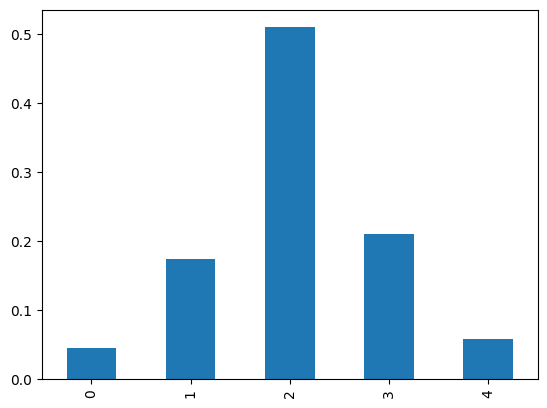

In [14]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize

In [17]:
from nltk.stem.snowball import SnowballStemmer

In [18]:
stemmer = SnowballStemmer(language='english')

In [19]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
", ".join(english_stopwords[:115])

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [23]:
selected_stopwords = english_stopwords[:115]

In [24]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, 
                             stop_words=selected_stopwords,
                             ngram_range=(1,2),
                             max_features = 2000)

In [25]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f719e53ab90>)

In [26]:
len(vectorizer.vocabulary_)

2000

In [27]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [28]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [29]:
inputs = vectorizer.transform(raw_df.Phrase)

In [30]:
inputs.shape

(156060, 2000)

In [31]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [33]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [34]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle


### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [35]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [36]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [37]:
TRAIN_SIZE = 110_000

In [38]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [39]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [40]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [41]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
train_preds = model.predict(train_inputs)

In [46]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [47]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [50]:
val_preds = model.predict(val_inputs)

In [51]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [52]:
small_df = raw_df.sample(20)

In [53]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
72117,72118,3683,China 's Sixth Generation of film makers,2
77107,77108,3966,Yale grad,3
78408,78409,4033,an uncertain start,2
16692,16693,721,`` Big Chill '' reunion,2
40035,40036,1917,feels so distant you might as well be watching...,0
37850,37851,1800,"The overall result is an intelligent , realist...",4
65851,65852,3340,"Symbolically , Warm Water Under a Red Bridge i...",3
86749,86750,4494,A film of ideas and wry comic mayhem .,3
153089,153090,8360,of class,2
93084,93085,4850,remarkable and novel,3


In [54]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [55]:
small_inputs.shape

(20, 2000)

In [56]:
small_preds = model.predict(small_inputs)

In [57]:
small_preds

array([2, 2, 2, 3, 1, 3, 3, 2, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 


In [58]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [59]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 181514 stored elements in Compressed Sparse Row format>

In [60]:
test_preds = model.predict(test_inputs)

In [61]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [62]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [63]:
sub_df.Sentiment = test_preds

In [64]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [65]:
sub_df.to_csv('submission.csv',index=None)

In [66]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)

### Model 1 - Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
model = MultinomialNB(class_prior=(0.05,0.2,.5,0.2,0.05))

In [69]:
model.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [70]:
accuracy_score(train_targets, model.predict(train_inputs))

0.5881636363636363

In [71]:
accuracy_score(val_targets, model.predict(val_inputs))

0.5453755970473295

### Model 2 - Decision Trees

In [72]:
from sklearn import tree

In [73]:
clf = tree.DecisionTreeClassifier()

In [77]:
clf.fit(train_inputs, train_targets)

DecisionTreeClassifier()

In [78]:
accuracy_score(train_targets, clf.predict(train_inputs))

0.7902727272727272

In [79]:
accuracy_score(val_targets, clf.predict(val_inputs))

0.5295049934867564

### Model 3 - Random Forests

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf = RandomForestClassifier()

In [83]:
clf.fit(train_inputs, train_targets)

RandomForestClassifier()

In [84]:
accuracy_score(train_targets, clf.predict(train_inputs))

0.7902727272727272

In [85]:
accuracy_score(val_targets, clf.predict(val_inputs))

0.5588363004776379

### Model 4 - Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
model = GradientBoostingClassifier()

In [88]:
model.fit(train_inputs, train_targets)

GradientBoostingClassifier()

In [89]:
accuracy_score(train_targets, model.predict(train_inputs))

0.5600181818181819

In [90]:
accuracy_score(val_targets, model.predict(val_inputs))

0.5184324793747286

### Model 4 - SVM

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [99]:
sc = StandardScaler(with_mean=False)
sc.fit(train_inputs)
train_std = sc.transform(train_inputs)

## Future Work

- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words